<a href="https://colab.research.google.com/github/Lishat/Transfer-Learning-on-CIFAR-10-dataset/blob/master/Transfer_learning_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models import resnet50
from torchvision.datasets import CIFAR10

In [0]:
resnet = resnet50(pretrained=True)

In [0]:
for param in resnet.parameters():
  param.requires_grad=False

In [0]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
resnet.fc = torch.nn.Linear(resnet.fc.in_features, 10)

In [0]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
cifarTrainSet = CIFAR10(root='./data', train=True, 
                                             download = True, 
                                             transform = transforms.Compose([
                                                  transforms.RandomHorizontalFlip(),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize((0.5, 0.5, 0.5), 
                                                                       (0.5, 0.5, 0.5))]))
cifarTestSet = CIFAR10(root='./data', train=False,
                                           download = True,
                                           transform = transforms.Compose([
                                               transforms.ToTensor(),
                                               transforms.Normalize((0.5, 0.5, 0.5),
                                                                   (0.5, 0.5, 0.5))
                                           ]))
cifarTrainLoader = torch.utils.data.DataLoader(cifarTrainSet, batch_size=256,
                                              shuffle=True, num_workers=2)
cifarTestLoader = torch.utils.data.DataLoader(cifarTestSet, batch_size=256,
                                              shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


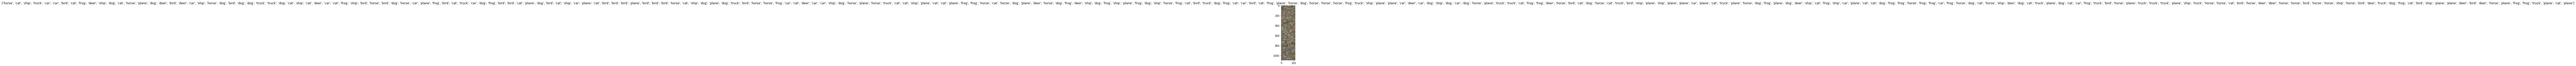

In [0]:
import numpy as np
import matplotlib.pyplot as plt
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
inputs = next(iter(cifarTrainLoader))
out = torchvision.utils.make_grid(inputs[0])
imshow(out, title=[classes[x] for x in inputs[1]])

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
Loss = torch.nn.CrossEntropyLoss()
Optimizer = torch.optim.Adam(resnet.parameters(), lr=0.0001)

In [0]:
for epoch in range(10):
  current_loss = 0.0
  for images, classes in cifarTrainLoader:
    images = images.to(device)
    classes = classes.to(device)
    Optimizer.zero_grad()
    obtained_outputs = resnet(images)
    loss = Loss(obtained_outputs, classes)
    loss.backward()
    Optimizer.step()
    current_loss += loss.item()
  print("TRAINING:\nEPOCH:", epoch)
  print("LOSS:", current_loss)
with torch.no_grad():
  correctly_classified = 0
  total = 0
  for images, classes in cifarTestLoader:
    images = images.to(device)
    classes = classes.to(device)
    correctly_classified += (torch.argmax(resnet(images), 1) == classes).sum().item()
    total += classes.size(0)
  print("OBTAINED ACCURACY:", correctly_classified*100/total)
    

TRAINING:
EPOCH: 0
LOSS: 401.1590596437454
TRAINING:
EPOCH: 1
LOSS: 342.54800629615784
TRAINING:
EPOCH: 2
LOSS: 321.0099757909775
TRAINING:
EPOCH: 3
LOSS: 310.16809582710266
TRAINING:
EPOCH: 4
LOSS: 301.7804721593857
TRAINING:
EPOCH: 5
LOSS: 297.5465180873871
TRAINING:
EPOCH: 6
LOSS: 293.8560400009155
TRAINING:
EPOCH: 7
LOSS: 288.8636397123337
TRAINING:
EPOCH: 8
LOSS: 285.8870404958725
TRAINING:
EPOCH: 9
LOSS: 283.93571734428406
OBTAINED ACCURACY: 50.4
